In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

Generate 2-dimensional data.

In [3]:
x = np.arange(1, 11, 1)
y = 1 + (2 * x) + (np.random.normal(0, 1, len(x)) * 2)
data = np.column_stack((x, y))

Use principal component analysis (PCA) to reduce the number of dimensions of the data from 2 to 1.

In [4]:
data_scaled = preprocessing.scale(data)
w, v = np.linalg.eig(np.cov(data_scaled, rowvar=False))
pca_main_axis = v[:,0]
projected_data = np.dot(data_scaled, pca_main_axis)

Construct the PCA line.

In [5]:
c0 = 0
c1 = pca_main_axis[1] / pca_main_axis[0]
f = lambda x: c0 + c1*x
pca_y = list(map(f, data_scaled[:,0]))

Plot the original data and the PCA line.

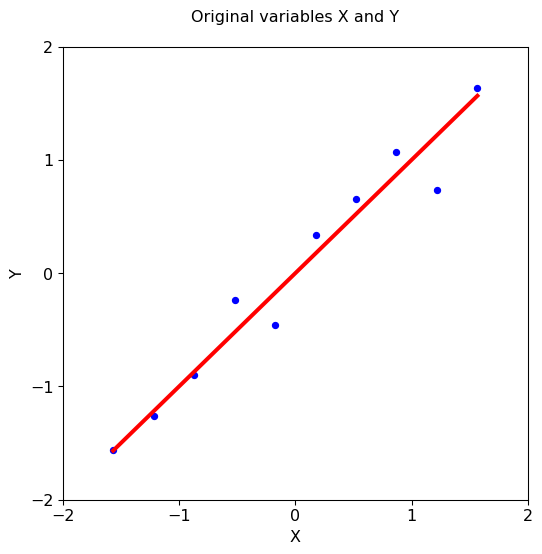

In [6]:
my_dpi = 96
plt.figure(figsize=(600/my_dpi, 600/my_dpi), dpi=my_dpi)

plt.scatter(data_scaled[:,0], data_scaled[:,1], color='b', s=20)
plt.plot(data_scaled[:,0], pca_y, color='r', linewidth=3)

plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.title('Original variables X and Y\n', fontsize=12)

plt.xticks(np.arange(-2, 3, 1), fontsize=12)
plt.yticks(np.arange(-2, 3, 1), fontsize=12)

plt.show()

Plot the reduced 1-dimensional data.

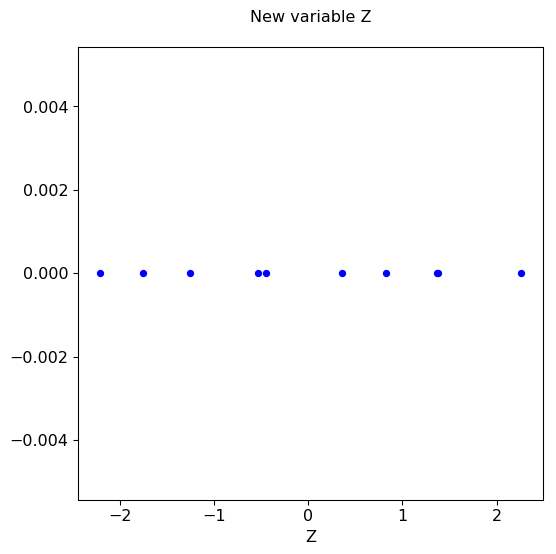

In [7]:
xx = projected_data
yy = np.zeros((len(projected_data)))

plt.figure(figsize=(600/my_dpi, 600/my_dpi), dpi=my_dpi)

plt.scatter(xx, yy, color='b', s=20)

plt.xlabel('Z', fontsize=12)
plt.title('New variable Z\n', fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()